Imports

In [176]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

import pandas as pd

import sys
from collections import defaultdict


sys.path.append("../neurometry/rep_metrics/")
# from neurometry.rep_metrics.load_nsd import get_neural_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


Import NSD shared515 data for 8 subjects

In [173]:
betas_path = (
    "/home/facosta/neurometry/neurometry/rep_metrics/nsd_data/special515_betas.parquet"
)

betas_df = pd.read_parquet(betas_path)

metas_path = (
    "/home/facosta/neurometry/neurometry/rep_metrics/nsd_data/special515_metas.parquet"
)

metas_df = pd.read_parquet(metas_path)

see voxel metadata

In [174]:
metas_df.head()

,voxel_id,subj_id,ncsnr,OFA,FFA-1,FFA-2,OPA,PPA,VWFA-1,VWFA-2,OWFA,EBA,FBA-1,FBA-2,mTL-bodies,mTL-words
0,S1-12-21-47,1,0.342872,0,0,0,0,0,0,0,0,1,0.0,0,NaN,NaN
1,S1-12-22-45,1,0.516901,0,0,0,0,0,0,0,0,1,0.0,0,NaN,NaN
2,S1-12-22-46,1,0.485629,0,0,0,0,0,0,0,0,1,0.0,0,NaN,NaN
3,S1-12-22-47,1,0.563912,0,0,0,0,0,0,0,0,1,0.0,0,NaN,NaN
4,S1-12-22-48,1,0.666176,0,0,0,0,0,0,0,0,1,0.0,0,NaN,NaN


see response data

In [175]:
betas_df.head()

,584,605,625,2270,2349,4442,5277,5684,6765,7932,...,566201,567837,570785,571499,573337,575164,575971,576789,577817,580813
voxel_id,,,,,,,,,,,,,,,,,,,,,
S1-12-21-47,-0.696273,0.221084,0.563967,-0.480192,0.309152,-0.284782,-0.024428,1.180742,0.906416,-0.467039,...,-0.211557,-0.099258,-0.212815,-0.254759,-0.285107,-0.175816,0.428142,0.311819,0.743101,-0.220602
S1-12-22-45,-0.252468,-0.551658,1.098079,0.222477,0.444054,1.006071,-0.518668,-0.416743,-0.124465,0.841309,...,-0.523219,0.718796,-1.059809,-1.572775,0.113519,0.283470,-0.061522,0.107281,0.089790,-0.460398
S1-12-22-46,-0.594955,-0.190817,-0.162851,-1.240821,-0.155264,0.161351,-0.977432,-1.056721,-0.120283,0.863250,...,0.648982,-0.556216,-0.177655,-0.250160,-0.238715,0.541429,-0.194957,-0.797478,1.074833,-0.197291
S1-12-22-47,-0.670456,-0.679704,1.253980,-0.945095,0.327074,1.268910,0.048171,-1.001101,-0.344076,0.199630,...,-0.237229,0.701947,-0.482878,-1.080150,-0.021459,0.683752,-0.098906,-0.508683,0.364412,-0.101696
S1-12-22-48,-1.984934,-0.571997,-0.170351,-0.438080,-0.062994,1.102930,-0.925044,-0.514434,0.479571,0.967257,...,0.473498,0.286785,-0.779721,-0.452516,0.143318,0.362318,-0.395665,0.539073,0.234517,0.636946


In [22]:
subject_ids = [1, 2, 3, 4, 5, 6, 7, 8]

functional_rois = list(metas_df.keys()[3:14])

# for now, no anatomy data
rois = {subject_id: functional_rois for subject_id in subject_ids}

In [177]:
def get_neural_data(subject_ids, voxel_metadata, response_data):
    rois = list(voxel_metadata.keys()[3:14])
    left_rois = {}
    right_rois = {}
    left_neural_data = defaultdict(lambda: defaultdict(dict))
    right_neural_data = defaultdict(lambda: defaultdict(dict))
    for subject_id in subject_ids:
        subject_dataframe = voxel_metadata[voxel_metadata["subj_id"] == subject_id]
        subject_left_rois, subject_right_rois = [], []
        for roi in rois:
            roi_voxel_idxs = subject_dataframe[subject_dataframe[roi] == True][
                "voxel_id"
            ]

            neural_data_subject_roi = response_data.loc[roi_voxel_idxs]

            num_voxels = len(neural_data_subject_roi)
            if num_voxels > 0:
                x_values = (
                    neural_data_subject_roi.index.to_series()
                    .str.split("-", expand=True)[1]
                    .astype(int)
                )
            else:
                x_values = pd.Series(dtype="int")

            left_hemisphere = neural_data_subject_roi[x_values < 40]
            right_hemisphere = neural_data_subject_roi[x_values >= 40]
            print(
                f"Subject {subject_id} has {len(left_hemisphere)} voxels in left region {roi}"
            )
            print(
                f"Subject {subject_id} has {len(right_hemisphere)} voxels in right region {roi}"
            )
            # neural_data[subject_id]["left"][region] = left_hemisphere
            # neural_data[subject_id]["right"][region] = right_hemisphere
            if len(left_hemisphere) > 0:
                left_neural_data[subject_id][roi] = left_hemisphere
                subject_left_rois.append(roi)
            if len(right_hemisphere) > 0:
                right_neural_data[subject_id][roi] = right_hemisphere
                subject_right_rois.append(roi)
        left_rois[subject_id] = subject_left_rois
        right_rois[subject_id] = subject_right_rois

    return left_neural_data, right_neural_data, left_rois, right_rois

In [178]:
voxel_metadata = metas_df
response_data = betas_df


left_neural_data, right_neural_data, left_rois, right_rois = get_neural_data(
    subject_ids, voxel_metadata, response_data
)

Subject 1 has 166 voxels in left region OFA
Subject 1 has 110 voxels in right region OFA
Subject 1 has 286 voxels in left region FFA-1
Subject 1 has 132 voxels in right region FFA-1
Subject 1 has 0 voxels in left region FFA-2
Subject 1 has 168 voxels in right region FFA-2
Subject 1 has 605 voxels in left region OPA
Subject 1 has 727 voxels in right region OPA
Subject 1 has 294 voxels in left region PPA
Subject 1 has 294 voxels in right region PPA
Subject 1 has 517 voxels in left region VWFA-1
Subject 1 has 144 voxels in right region VWFA-1
Subject 1 has 127 voxels in left region VWFA-2
Subject 1 has 148 voxels in right region VWFA-2
Subject 1 has 128 voxels in left region OWFA
Subject 1 has 231 voxels in right region OWFA
Subject 1 has 888 voxels in left region EBA
Subject 1 has 1165 voxels in right region EBA
Subject 1 has 243 voxels in left region FBA-1
Subject 1 has 90 voxels in right region FBA-1
Subject 1 has 0 voxels in left region FBA-2
Subject 1 has 251 voxels in right region F

In [183]:
import cortex

def get_subjects_anatomical_rois(subject_ids):
    subject_rois = {}
    for subject_id in subject_ids:
        subject = f"subj0{subject_id}"
        subject_rois[subject_id] = list(cortex.get_roi_verts(subject).keys())
    return subject_rois

In [184]:
anatomical_rois = get_subjects_anatomical_rois(subject_ids)

/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/cortex/svgoverlay.py:499: UserWarning: Requested layer in svg file (floc-places) contains no splines
  warnings.warn("Requested layer in svg file (%s) contains no splines"%self.name)
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/cortex/svgoverlay.py:499: UserWarning: Requested layer in svg file (floc-faces) contains no splines
  warnings.warn("Requested layer in svg file (%s) contains no splines"%self.name)
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/cortex/svgoverlay.py:499: UserWarning: Requested layer in svg file (floc-bodies) contains no splines
  warnings.warn("Requested layer in svg file (%s) contains no splines"%self.name)
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/cortex/svgoverlay.py:499: UserWarning: Requested layer in svg file (prf-visualrois) contains no splines
  warnings.warn("Requested layer in svg file (%s) contains no splines"%s

In [207]:
anatomical_rois[1]

['RSC',
 'aTL-faces',
 'FFA-1',
 'OFA',
 'FFA-2',
 'EBA',
 'FBA-1',
 'FBA-2',
 'EarlyVis',
 'mTL-words',
 'mfs-words',
 'VWFA-2',
 'VWFA-1',
 'OWFA',
 'OPA',
 'PPA',
 'floc-places',
 'floc-faces',
 'floc-bodies',
 'prf-visualrois',
 'prf-eccrois',
 'floc-words',
 'visual rois',
 'eccentricity rois',
 'places rois']

In [203]:
def get_roi_list_intersection(roi_list1, roi_list2):
    set1 = set(roi_list1)
    set2 = set(roi_list2)

    intersection = set1 & set2

    return list(intersection)

In [208]:
common_rois = {}
for subject_id in subject_ids:
    common_rois[subject_id] = get_roi_list_intersection(
        functional_rois, anatomical_rois[subject_id]
    )

find number of vertices in each roi in each hemisphere for every subject

In [209]:
for subject_id in subject_ids:
    subject = f"subj0{subject_id}"
    left_surface, right_surface = (
        cortex.polyutils.Surface(*d) for d in cortex.db.get_surf(subject, "fiducial")
    )
    for roi in common_rois[subject_id]:
        vertex_mask = cortex.get_roi_verts(subject, roi=roi, mask=True)[roi]
        left_roi_surface = left_surface.create_subsurface(vertex_mask=vertex_mask)
        right_roi_surface = right_surface.create_subsurface(vertex_mask=vertex_mask)
        print(subject, roi, len(left_roi_surface.pts), len(right_roi_surface.pts))

subj01 PPA 2150 790
subj01 FFA-1 1114 595
subj01 OWFA 465 108
subj01 OFA 876 220
subj01 FFA-2 0 0
subj01 EBA 4610 2408
subj01 VWFA-2 660 171
subj01 FBA-1 1080 520
subj01 FBA-2 0 0
subj01 OPA 3508 1890
subj01 VWFA-1 2671 1015
subj02 PPA 2070 849
subj02 FFA-1 536 200
subj02 OWFA 837 242
subj02 OFA 825 373
subj02 FFA-2 842 282
subj02 EBA 7083 4208
subj02 VWFA-2 429 120
subj02 FBA-2 2897 1053
subj02 OPA 3549 2210
subj02 VWFA-1 990 576
subj03 PPA 2941 1117
subj03 FFA-1 992 378
subj03 OWFA 1092 405
subj03 OFA 1796 678
subj03 FFA-2 1174 198
subj03 EBA 8518 4787
subj03 VWFA-2 643 113
subj03 FBA-1 1308 461
subj03 FBA-2 872 148
subj03 OPA 3356 1668
subj03 VWFA-1 3318 1588
subj04 PPA 2057 810
subj04 FFA-1 921 526
subj04 OFA 1160 520
subj04 EBA 8539 5121
subj04 FFA-2 975 276
subj04 FBA-1 1795 647
subj04 FBA-2 0 0
subj04 OPA 2896 1806
subj05 PPA 2792 1248
subj05 FFA-1 617 179
subj05 OWFA 1233 522
subj05 OFA 1926 1078
subj05 FFA-2 627 264
subj05 EBA 10085 5753
subj05 VWFA-2 453 121
subj05 FBA-1 1019

In [212]:
from neurometry.rep_metrics.anatomy import compute_all_frechet_means

In [228]:
subject_id = 1

subject = f"subj0{subject_id}"

left_surface, right_surface = (
    cortex.polyutils.Surface(*d) for d in cortex.db.get_surf(subject, "fiducial")
)

rois_frechet_mean_ids, nonempty_rois = compute_all_frechet_means(
    subject, left_surface, common_rois[subject_id]
)

computing Frechet mean of PPA...


/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


done.
computing Frechet mean of FFA-1...
done.
computing Frechet mean of OWFA...
done.
computing Frechet mean of OFA...
done.
computing Frechet mean of FFA-2...
skipping...
computing Frechet mean of EBA...
done.
computing Frechet mean of VWFA-2...
done.
computing Frechet mean of FBA-1...
done.
computing Frechet mean of FBA-2...
skipping...
computing Frechet mean of OPA...
done.
computing Frechet mean of VWFA-1...
done.


In [231]:
from neurometry.rep_metrics.anatomy import compute_cortex_pairwise_geodesic_dist


subject_id = 8

subject = f"subj0{subject_id}"


compute_cortex_pairwise_geodesic_dist(subject, common_rois[subject_id])

computing Frechet mean of PPA...


/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


done.
computing Frechet mean of FFA-1...
done.
computing Frechet mean of EBA...
done.
computing Frechet mean of FFA-2...
done.
computing Frechet mean of OPA...
done.
computing Frechet mean of PPA...


RuntimeError: Factor is exactly singular

In [187]:
subject = f"subj0{1}"
roi = "PPA"

surfs = [cortex.polyutils.Surface(*d) for d in cortex.db.get_surf(subject, "fiducial")]
# vertex_mask = cortex.get_roi_verts(subject, roi=roi, mask=True)[roi]
# left_roi_surface = surface.create_subsurface(vertex_mask=vertex_mask)
# roi_pts_ids = cortex.get_roi_verts(subject, roi=roi)[roi]

In [191]:
vertex_mask = cortex.get_roi_verts(subject, roi=roi, mask=True)[roi]
left_roi_surface = surfs[0].create_subsurface(vertex_mask=vertex_mask)

In [193]:
left_roi_surface.pts

array([[-14.99928284, -47.49650574, -20.29627228],
       [-14.95354939, -47.31936646, -20.88214493],
       [-15.51294327, -47.57215881, -21.28660202],
       ...,
       [-13.75135803, -11.35721302, -19.53512001],
       [-14.02146721, -11.39989853, -20.09712219],
       [-14.33289719, -11.44877815, -20.62385178]])

In [109]:
def get_neural_data_nonempty_rois(neural_data):
    neural_data_nonempty_rois = defaultdict(lambda: defaultdict(dict))
    subject_ids = list(neural_data.keys())
    hemis = ["left", "right"]
    functional_rois = list(neural_data[subject_ids[0]]["left"].keys())
    for subject_id in subject_ids:
        for hemi in hemis:
            for roi in functional_rois:
                if len(neural_data[subject_id][hemi][roi]) > 0:
                    hemi_roi = f"{hemi}-{roi}"
                    neural_data_nonempty_rois[subject_id][hemi_roi] = neural_data[
                        subject_id
                    ][hemi][roi]
    return neural_data_nonempty_rois

In [110]:
nonempty_neural_data = get_neural_data_nonempty_rois(neural_data)

In [113]:
len(nonempty_neural_data[1].keys())

20

In [95]:
neural_data[1]["left"]["FFA-1"]

(286, 515)

In [108]:
nonempty_neural_data[1]["FFA-2"]["middle"]

{}

In [82]:
subject_ids = list(neural_data.keys())

In [86]:
neural_data[subject_ids[0]]["left"].keys()

dict_keys(['OFA', 'FFA-1', 'FFA-2', 'OPA', 'PPA', 'VWFA-1', 'VWFA-2', 'OWFA', 'EBA', 'FBA-1', 'FBA-2'])

### check that we can plot activity on cortex:

In [56]:
import nibabel as nib

nsd_path = "/scratch/facosta/NSD"


def get_subj_dims(subj):
    fn = f"{nsd_path}/nsddata/ppdata/{subj}/func1pt8mm/mean.nii.gz"
    return nib.load(fn).get_fdata().shape


subj = "subj01"
space = "func1pt8mm"
xfm = "func1pt8_to_anat0pt8_autoFSbbr"
beta_version = "betas_fithrf_GLMdenoise_RR"

In [72]:
import numpy as np

subject_id = 1
coco_id = 605

volumetric_data = np.zeros(get_subj_dims(subj))
volumetric_data[:] = np.nan


for region in rois[1]:
    response = neural_data[subject_id]["left"][region]
    for row_i, row in response.iterrows():
        _, x, y, z = row_i.split("-")
        x, y, z = int(x), int(y), int(z)
        volumetric_data[x, y, z] = response.loc[row_i][coco_id]


voxel_data = volumetric_data

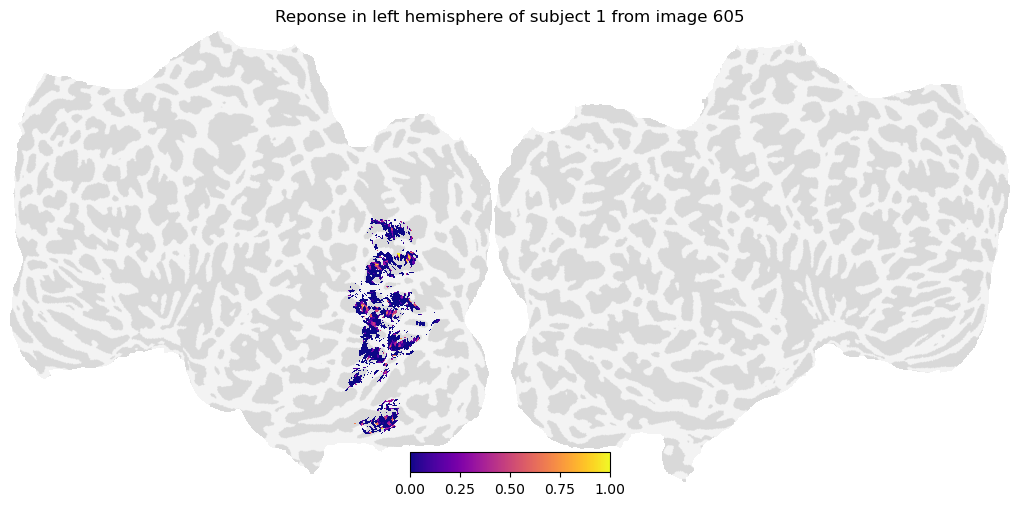

In [73]:
import neurometry.rep_metrics.viz as viz

# Generate the plot_data and fig using plot_ROI_flatmap function
volume, fig = viz.plot_ROI_flatmap(
    voxel_data,
    subj,
    figsize=(10, 5),
    cmap="plasma",
    vmin=0,
    vmax=1.0,  # rois = True,
    title=f"Reponse in left hemisphere of subject {subject_id} from image {coco_id}",
)

brain_plot = viz.convert_figure_to_image(fig)

### RSA

In [179]:
import neurometry.rep_metrics.dissimilarity as dissimilarity

Parallelizing n(n-1)/2 = 36 distance calculations with 32 processes.


Computing distances: 100%|██████████| 36/36.0 [00:00<00:00, 351.09it/s]


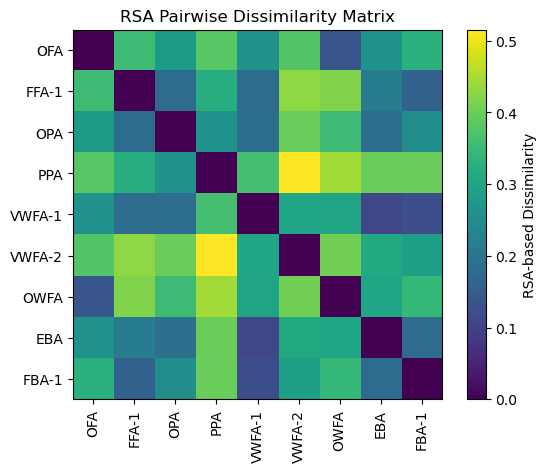

In [181]:
rsa_pairwise_dissimilarity_matrix = dissimilarity.compute_rsa_pairwise_dissimilarities(
    left_neural_data[1], left_rois[1], "pearson", "pearson"
)

viz.plot_pairwise_dis_matrix(rsa_pairwise_dissimilarity_matrix, left_rois[1], "RSA")